In [2]:
import json
import re
import pandas as pd
import numpy as np
import scrapy
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.testing import assert_frame_equal # to compare two dataframes
# YOUR CODE HERE (OPTION) 
# Nếu cần các thư viện khác thì bạn có thể import thêm tại đây

In [63]:
df=pd.read_json('film_crawler/film_crawler/dataset/data_film.json',encoding='utf-8-sig')
display(df)

,Name,Published Year,Rated,Duration,Genres,Director,Writers,Stars,User_reviews,Critic_reviews,IMDb RATING,Popularity,Meta score,Wins
0,The Godfather,1972.0,R,"[2, h, , 55, m]","[Crime, Drama]",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",5.2K,192,9.2,65,100.0,Won 3 Oscars
1,Goodfellas,1990.0,R,"[2, h, , 25, m]","[Biography, Crime, Drama]",[Martin Scorsese],"[Nicholas Pileggi, Martin Scorsese]","[Robert De Niro, Ray Liotta, Joe Pesci]",1.5K,163,8.7,135,90.0,Won 1 Oscar
2,Pulp Fiction,1994.0,R,"[2, h, , 34, m]","[Crime, Drama]",[Quentin Tarantino],"[Quentin Tarantino, Roger Avary]","[John Travolta, Uma Thurman, Samuel L. Jackson]",3.5K,299,8.9,99,94.0,Won 1 Oscar
3,The Usual Suspects,1995.0,R,"[1, h, , 46, m]","[Crime, Drama, Mystery]",[Bryan Singer],[Christopher McQuarrie],"[Kevin Spacey, Gabriel Byrne, Chazz Palminteri]",1.4K,154,8.5,454,77.0,Won 2 Oscars
4,Apocalypse Now,1979.0,R,"[2, h, , 27, m]","[Drama, Mystery, War]",[Francis Ford Coppola],"[John Milius, Francis Ford Coppola, Michael Herr]","[Martin Sheen, Marlon Brando, Robert Duvall]",1.3K,302,8.5,287,94.0,Won 2 Oscars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Blade II,2002.0,R,"[1, h, , 57, m]","[Action, Horror, Sci-Fi]",[Guillermo del Toro],"[Marv Wolfman, Gene Colan, David S. Goyer]","[Wesley Snipes, Kris Kristofferson, Ron Perlman]",613,221,6.7,"2,280",52.0,Awards
996,Falling Down,1993.0,R,"[1, h, , 53, m]","[Action, Crime, Drama]",[Joel Schumacher],[Ebbe Roe Smith],"[Michael Douglas, Robert Duvall, Barbara Hershey]",523,96,7.6,"1,809",56.0,Awards
997,Eyes Wide Shut,1999.0,TV-MA,"[2, h, , 39, m]","[Drama, Mystery, Thriller]",[Stanley Kubrick],"[Stanley Kubrick, Frederic Raphael, Arthur Sch...","[Tom Cruise, Nicole Kidman, Todd Field]",1.7K,284,7.5,269,68.0,Awards
998,The Lost Boys,1987.0,R,"[1, h, , 37, m]","[Comedy, Horror]",[Joel Schumacher],"[Jan Fischer, James Jeremias, Jeffrey Boam]","[Jason Patric, Corey Haim, Dianne Wiest]",486,174,7.2,873,63.0,Awards


<div style=" background-color:#FFB266; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 3</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Liệu những phim được đóng bởi diễn viên xuất hiện nhiều trong top phim hay có còn trending ở thời điểm hiện tại không? Nếu không thì có mâu thuẫn gì với điểm IMDb không?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời câu hỏi sẽ giúp những nhà làm phim xác định được những bộ phim do các diễn viên hạng A đóng có tạo trend và tạo ấn tượng lâu dài cho người xem không. Bởi không ai muốn xem bộ phim bị flop cả, nhà làm phim lẫn đạo diễn cũng không mong điều đó dù là thời gian nào. Điều này sẽ giúp đảm bảo được lợi nhuận nếu gửi gắm nhân vật đúng diễn viên hạng A có thể gánh phim.  </div>


***Bước 1:*** Để trả lời câu hỏi đó, đầu tiên, ta cần tìm xem những diễn viên gạo cội nào xuất hiện nhiều trong top phim hay. 
Kết quả tìm được sẽ lưu vào dataframe `top_star`.

In [64]:
d=copy.deepcopy(df['Stars'])

list_stars=[]
for i in d:
    list_stars.extend(i)

list_stars=pd.DataFrame(list_stars)
list_stars
count=list_stars.value_counts()
top_star=[]
count
list_stars=count.keys()
list_stars
for i in range(5):
    top_star.append(list_stars[i][0])
top_star=pd.DataFrame(top_star)
top_star=top_star.rename(columns={0:'Actor'})
print('Top 5 diễn viên gạo cội xuất hiện nhiều nhất trong top phim hay:')
top_star

Top 5 diễn viên gạo cội xuất hiện nhiều nhất trong top phim hay:


,Actor
0,Robert De Niro
1,Tom Cruise
2,Tom Hanks
3,Al Pacino
4,Brad Pitt


***Bước 2***: Những diễn viên vừa tìm được đó sẽ giúp ta xác định được tên những bộ phim do từng diễn viên đó đóng. Lưu lại lần lượt những phim của từng diễn viên vào các biến `top_1`,`top_2`,`top_3`,`top_4`,`top_5`.

In [65]:
def findFilm(df,name):
    list_idx=[]
    idx=0
    for stars in df['Stars']:
        # print(stars)
        if name in stars:
            list_idx.append(idx)
        idx+=1
    list_film=[]
    for i in range(len(list_idx)):
        list_film.append(df['Name'][list_idx[i]])
    return list_film
top_1=findFilm(df,top_star['Actor'][0])
top_2=findFilm(df,top_star['Actor'][1])
top_3=findFilm(df,top_star['Actor'][2])
top_4=findFilm(df,top_star['Actor'][3])
top_5=findFilm(df,top_star['Actor'][4])
print('Những phim do diễn viên top 1 đóng:')
top_1=pd.DataFrame(top_1)
top_1=top_1.rename(columns={0:'Film'})
display(top_1)

print('\n\nNhững phim do diễn viên top 2 đóng:')
top_2=pd.DataFrame(top_2)
top_2=top_2.rename(columns={0:'Film'})
display(top_2)

print('\n\nNhững phim do diễn viên top 3 đóng:')

top_3=pd.DataFrame(top_3)
top_3=top_3.rename(columns={0:'Film'})
display(top_3)

print('\n\nNhững phim do diễn viên top 4 đóng:')

top_4=pd.DataFrame(top_4)
top_4=top_4.rename(columns={0:'Film'})
display(top_4)

print('\n\nNhững phim do diễn viên top 5 đóng:')
top_5=pd.DataFrame(top_5)
top_5=top_5.rename(columns={0:'Film'})
display(top_5)



Những phim do diễn viên top 1 đóng:


,Film
0,Goodfellas
1,Taxi Driver
2,The Godfather Part II
3,Heat
4,Raging Bull
5,Once Upon a Time in America
6,Casino
7,The Untouchables
8,The Deer Hunter
9,Meet the Parents




Những phim do diễn viên top 2 đóng:


,Film
0,Magnolia
1,Rain Man
2,Minority Report
3,The Color of Money
4,Interview with the Vampire: The Vampire Chroni...
5,Top Gun
6,Jerry Maguire
7,Mission: Impossible - Ghost Protocol
8,Mission: Impossible
9,Collateral




Những phim do diễn viên top 3 đóng:


,Film
0,Toy Story
1,The Green Mile
2,Forrest Gump
3,Toy Story 2
4,Saving Private Ryan
5,Road to Perdition
6,Toy Story 3
7,Catch Me If You Can
8,Big
9,Captain Phillips




Những phim do diễn viên top 4 đóng:


,Film
0,The Godfather
1,The Godfather Part II
2,Scarface
3,Heat
4,Dog Day Afternoon
5,Glengarry Glen Ross
6,Carlito's Way
7,Donnie Brasco
8,The Irishman
9,Insomnia




Những phim do diễn viên top 5 đóng:


,Film
0,Fight Club
1,Se7en
2,Inglourious Basterds
3,12 Monkeys
4,Interview with the Vampire: The Vampire Chroni...
5,Ocean's Eleven
6,Snatch
7,Moneyball
8,The Curious Case of Benjamin Button
9,Sleepers


***Tiền xử lý:*** Lúc này, việc tiếp theo là xác định những bộ phim do các diễn viên đó đóng còn trend không, thì ta cần phải dùng tới cột `Popularity`. Nhưng lúc này, ta nhận thấy kiểu dữ liệu ở cột này là `str` nên ta cần chuyển lại về `int` để tính toán.

In [66]:
def handlePopularity(df):
    for i in range(1000):
        if df['Popularity'].values[i]:
            if len(df['Popularity'].values[i])>3:
                df['Popularity'].values[i]=df['Popularity'].values[i].replace(',','')

handlePopularity(df)
df = df.fillna(value=0)

df['Popularity']=df['Popularity'].astype(int)


***Bước 4:*** Tính bình quân điểm `Popularity` và điểm `IMDb` của toàn bộ phim do từng diễn viên hàng đầu đóng. Những hàng dữ liệu sẽ được lưu theo thứ tự từ top 1 đến top 5 của dataframe `average_top`.

Lý do chúng ta dùng 2 điểm `Popularity` và `IMDb` là vì:

- IMDb là thang điểm thể hiện đánh giá của người xem trên nhiều nền tảng Internet.
- Popularity cũng là thang điểm được đánh giá thông qua lượng truy cập của người xem.

Qua đó, ta sẽ biết được phim này có trending không khi tương quan mỗi điểm đó với tổng bình quân phim trong danh sách.

In [70]:
def averagePopularity(df,list_film):
    list_popularity=[]
    for name in list_film:
        temp=df.loc[df['Name']==name]
        temp=temp['Popularity']
        list_popularity.append(temp.values[0])
    return round(sum(list_popularity)/len(list_popularity),1)

def averageIMDb(df,list_film):
    list_IMDb=[]
    for name in list_film:
        temp=df.loc[df['Name']==name]
        temp=temp['IMDb RATING']
        list_IMDb.append(temp.values[0])
    return round(sum(list_IMDb)/len(list_IMDb),1)
average_top=[]
average_top.append([averagePopularity(df,top_1['Film']),averageIMDb(df,top_1['Film'])])
average_top.append([averagePopularity(df,top_2['Film']),averageIMDb(df,top_2['Film'])])
average_top.append([averagePopularity(df,top_3['Film']),averageIMDb(df,top_3['Film'])])
average_top.append([averagePopularity(df,top_4['Film']),averageIMDb(df,top_4['Film'])])
average_top.append([averagePopularity(df,top_5['Film']),averageIMDb(df,top_5['Film'])])
average_top=pd.DataFrame(average_top)
xs=['Top 1','Top 2','Top 3','Top 4', 'Top 5']
xs=pd.DataFrame(xs)
xs=xs.rename(columns={0:'Top'})
average_top=average_top.rename(columns={0:'Average Popularity',1:'Average IMDb'})
average_top.insert(0,'Top',xs['Top'])
average_top


,Top,Average Popularity,Average IMDb
0,Top 1,1650.1,7.7
1,Top 2,1560.1,7.3
2,Top 3,1048.2,8.0
3,Top 4,1315.2,8.0
4,Top 5,860.3,7.9


***Bước 5:*** Ta sẽ xét xem những điểm bình quân trên có cao hơn điểm trung bình trong cả danh sách không. Điều này sẽ giúp đánh giá được bình quân mỗi bộ phim của các diễn viên gạo cội có thực sự xuất sắc và treding hơn cả trong thời điểm hiện tại không.

In [80]:
average_popularity=round(df['Popularity'].sum()/1000,1)
average_IMDb=round(df['IMDb RATING'].sum()/1000,1)
print('Diễn viễn có bình quân mỗi phim trending cao hơn trung bình:')
display(average_top.loc[average_top['Average Popularity']>average_popularity])
print('\n\nDiễn viễn có bình quân mỗi phim được người xem đánh giá cao hơn trung bình:')
display(average_top.loc[average_top['Average IMDb']>average_IMDb])


Diễn viễn có bình quân mỗi phim trending cao hơn trung bình:


,Top,Average Popularity,Average IMDb
0,Top 1,1650.1,7.7
1,Top 2,1560.1,7.3




Diễn viễn có bình quân mỗi phim được người xem đánh giá cao hơn trung bình:


,Top,Average Popularity,Average IMDb
0,Top 1,1650.1,7.7
2,Top 3,1048.2,8.0
3,Top 4,1315.2,8.0
4,Top 5,860.3,7.9


***Nhận xét:*** 

- Những bộ phim của những diễn viên gạo cội (xuất hiện nhiều trong top phim hay) không hoàn toàn trending ở hiện tại. Có thể lý giải là vì, theo thời gian, thị hiếu người xem thay đổi, có những phim nhân văn và ý nghĩa dần trở nên kén người xem. Dòng phim nghệ thuật cũng phải cạnh tranh với các dòng phim thương mại "kiểu mì ăn liền", đã không còn hiệu ứng trending như những năm ở thế kỷ trước.
- Đồng thời, những phim do diễn viên đó đóng hầu như sẽ cao hơn bình quân điểm IMDb. Hơi trái ngược với điểm Popularity nhưng có thể hiểu rằng, bởi nếu ai dành thời gian xem những bộ phim đó đều sẽ dành lời khen và đánh giá tích cực, chỉ là ở thời điểm hiện tại, quá nhiều bộ phim tràn lan ngoài kia được quay mỗi ngày và chúng ta ai cũng thích xem những phim mới chứ sẽ thường không đào lại những phim cũ của thế kỷ trước, hoặc mười mấy năm trước. Vậy nên điểm Popularity sẽ rất khác với IMDb.

***Minh hoạ:*** Vẽ biểu đồ tương quan sự khác nhau giữa 2 thang điểm. Đưa ra nhận xét và trả lời câu hỏi đã nêu.

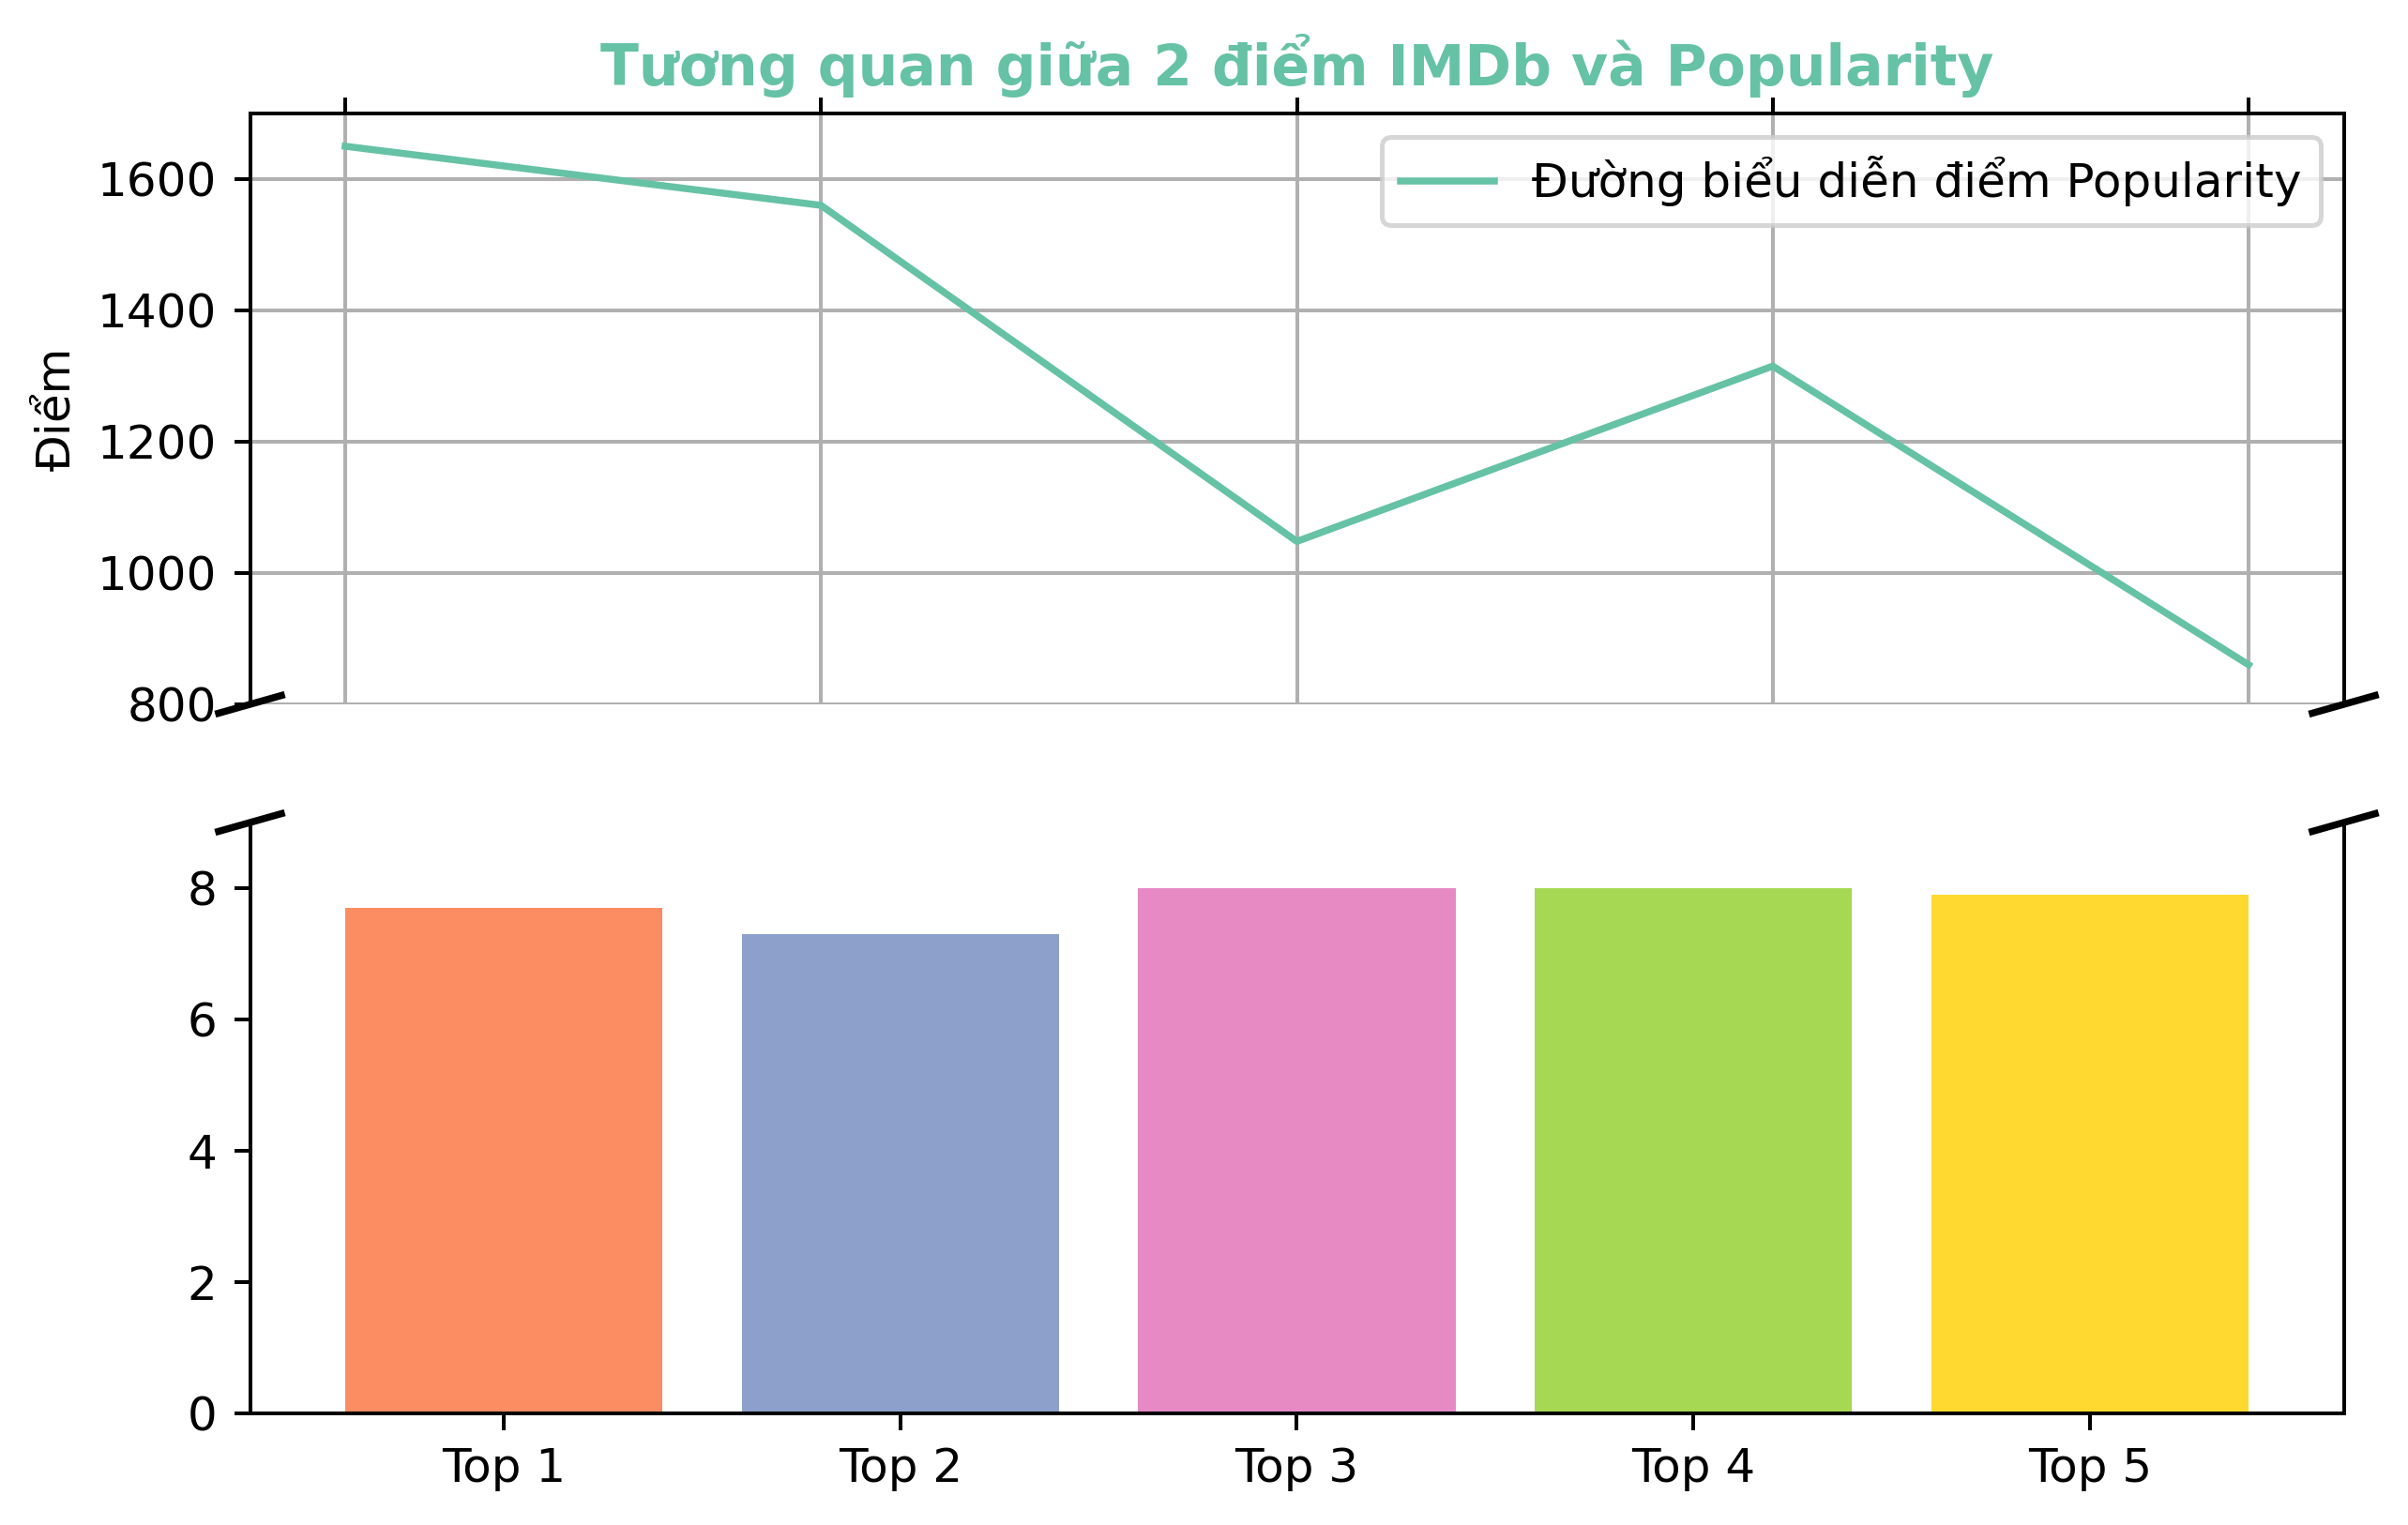

In [83]:
bar_width=0.5
xs=['Top 1','Top 2','Top 3','Top 4', 'Top 5']

plt.rcParams['figure.dpi'] = 360

fig,(ax,ax2) = plt.subplots(2,1,figsize =(8, 5))
colors = sns.color_palette('Set2')

ax.set_title('Tương quan giữa 2 điểm IMDb và Popularity',fontweight='bold',color=colors[0])
ax.set_ylabel('Điểm')
ax.plot(xs,average_top['Average Popularity'],color=colors[0])
ax2.bar(xs,average_top['Average IMDb'],color=colors[1:6])
ax.set_ylim(800,1700)
ax2.set_ylim(0,9)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  
ax2.xaxis.tick_bottom()
d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs) 

kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 
ax.grid()
ax.legend(['Đường biểu diễn điểm Popularity']);

plt.show()

***Nhận xét:***

- Bình quân điểm IMDb rất không chênh lệch quá nhiều ở thang điểm 10 và những điểm này chỉ phân bố từ 7 đến 8. Điều này thể hiện những diễn viên hạng A đóng bộ phim nào thì chất lượng bộ phim đó. Bởi theo thang IMDb, trên 7 đã là một bộ phim hay.
- Bình quân điểm Popularity chênh lệch khá nhiều theo điểm lớn hơn IMDb. Những điểm này phân bố từ khoảng 800 đến hơn 1600. Điều này cho thấy rất khó để giữ trending theo thời gian dù phim đó rất hay tại thời điểm ra mắt. 
- Thông qua 2 biểu đồ, để ý thấy top 3, 4, 5 đang có điểm Popularity thấp hơn top 1 và 2 nhưng lại có bình quân điểm IMDb cao hơn. Như đã giải thích ở nhận xét trước đó, việc điểm Popularity thay đổi sẽ không ảnh hưởng tới điểm IMDb và ngược lại.

***Trả lời câu hỏi:***

- Những phim được đóng bởi diễn viên xuất hiện nhiều trong top phim hay không chắc sẽ trending ở thời điểm hiện tại vì còn tuỳ thuộc vào nhiều yếu tố khác như thị hiếu của người xem ở thời điểm hiện tại sẽ khác ở quá khứ.
- Điều này hầu như không có mâu thuẫn gì với điểm IMDb bởi như 2 nhận xét đã nêu, 2 điểm này không ảnh hưởng tới nhau và có các yếu tố để đánh giá quá khác nhau.